In [3]:
using CSV, DataFrames, Plots

# Read in the data

trajectories = CSV.read("../data/full_data_inds.csv.gz", DataFrame)
# Read the codes dictionaries of the species and the eezs
eez_codes = CSV.read("../data/eez_to_int.csv", DataFrame)
int_to_eez = Dict(zip(eez_codes.Int, eez_codes.EEZ))
species_codes = CSV.read("../data/species_to_int.csv", DataFrame)
int_to_species = Dict(zip(species_codes.Int, species_codes.Species))


Dict{Int64, String31} with 111 entries:
  5   => "Australian fur seal"
  56  => "Longfin mako shark"
  35  => "Galapagos shark"
  55  => "Long-nosed fur seal"
  110 => "White-tailed tropic bird"
  60  => "Murphys petrel"
  30  => "Dusky shark"
  32  => "Fin whale"
  6   => "Australian sea lion"
  67  => "Northern gannet"
  45  => "Ivory gull"
  73  => "Pelagic thresher shark"
  64  => "Northern elephant seal"
  90  => "Shortfin mako shark"
  4   => "Audouins gull"
  13  => "Blue whale"
  54  => "Loggerhead turtle"
  63  => "Northern Right whale"
  86  => "Scopolis shearwater"
  ⋮   => ⋮

In [9]:
agg_data = unique(trajectories[:, [:newid, :Species, :EEZ]])


unique_species = unique(agg_data.Species)
unique_eez = unique(agg_data.EEZ)

agg_data




Row,Species,EEZ,nrow
,Int64,Int64,Int64
1,0,7,151
2,1,-1,14
3,1,24,4
4,1,39,28
5,1,49,1
6,1,60,3
7,1,93,4
8,1,113,1
9,1,118,1


In [20]:
counts_sp_eez

Row,Species,EEZ,nrow
,Int64,Int64,Int64
1,0,7,151
2,1,-1,14
3,1,24,4
4,1,39,28
5,1,49,1
6,1,60,3
7,1,93,4
8,1,113,1
9,1,118,1


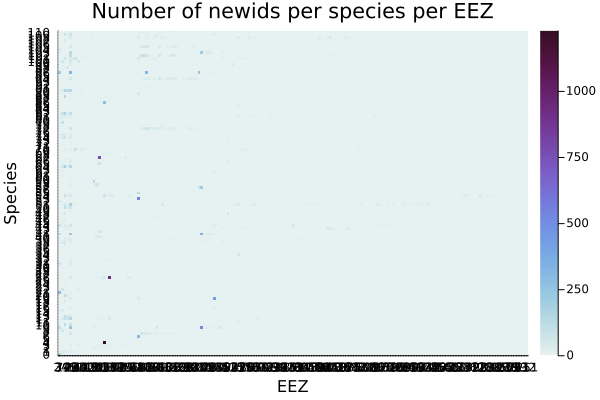

In [96]:
using Plots
# create a histogram of the number EEZs per species, counting the number that each newid of a species has
counts_sp_eez = combine(groupby(agg_data, [:Species, :EEZ]), nrow)

# creeate a matrix of the counts of the number of EEZs per species
counts_sp_eez_mat = zeros(Int32, length(unique_species), length(unique_eez))
for (i, eez) in enumerate(unique_eez)
    for (j, sp) in enumerate(unique_species)
        counts = counts_sp_eez[(counts_sp_eez.Species .== sp) .& (counts_sp_eez.EEZ .== eez), :nrow]
        counts_sp_eez_mat[j, i] = !isempty(counts) ? counts[1] : 0
    end
end

# plot the matrix
heatmap(counts_sp_eez_mat, xticks=(1:length(unique_eez), unique_eez), yticks=(1:length(unique_species), unique_species), c=cgrad(:dense, rev=false), xlabel="EEZ", ylabel="Species", title="Number of newids per species per EEZ")
    

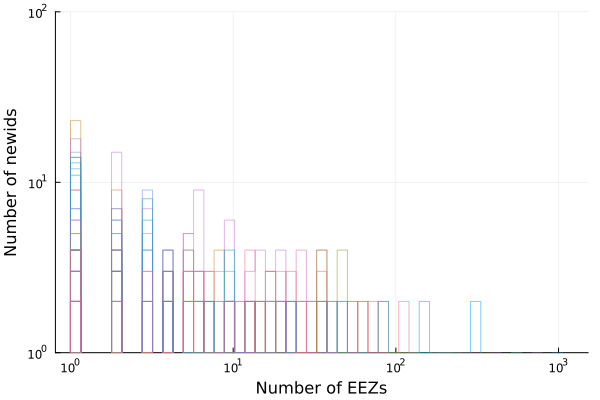

In [142]:


# create bins for the histogram in log10 scale
bins = 10 .^ range(log10(minimum(counts_sp_eez.nrow)), log10(maximum(counts_sp_eez.nrow)), length=50)


p1 = plot()
for sp in unique_species
    dist = counts_sp_eez[counts_sp_eez.Species .== sp, :nrow]
    # println(dist)
    if length(dist) > 0
        # norm_dist = dist ./ sum(dist)
        stephist!(p1, dist, alpha=0.5, yscale=:log10, xscale=:log10, bins=bins, label=int_to_species[sp])
    end
end
xaxis!("Number of EEZs", [1, 10, 100, 1000])
yaxis!("Number of newids", [1, 10, 100], ylimits=(1, 100))
plot!(legend=false)
p1


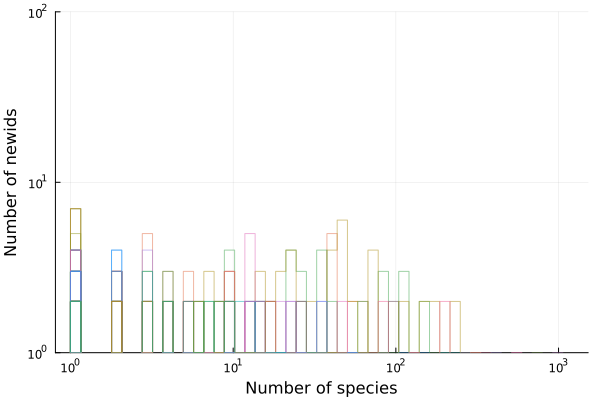

In [143]:
p2 = plot()
for eez in unique_eez
    dist = counts_sp_eez[counts_sp_eez.EEZ .== eez, :nrow]
    # println(dist)
    if length(dist) > 0
        # norm_dist = dist ./ sum(dist)
        stephist!(p2, dist, alpha=0.5, yscale=:log10, xscale=:log10, bins=bins, label=int_to_eez[eez])
    end
end
xaxis!("Number of species", [1, 10, 100, 1000])
yaxis!("Number of newids", [1, 10, 100], ylimits=(1, 100))
plot!(legend=false)
p2


In [121]:
int_to_eez[246]

"United States"